In [6]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

batch_size = 32
block_size = 512


def get_batch(data):
    ix = torch.randint(len(data) - block_size, (batch_size,))
    print(ix)
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

In [7]:
data = torch.randn((1000))
data.size()

torch.Size([1000])

In [8]:
x, y = get_batch(data)
x.size(), y.size()

tensor([298,  36, 485, 398, 478, 415, 213, 414,  75, 174, 174, 215, 292, 463,
        228, 216, 394, 471, 265, 468, 387,  70, 167, 389,   1, 185, 457, 346,
        203,  20, 316, 144])


(torch.Size([32, 512]), torch.Size([32, 512]))

In [10]:
x

tensor([[ 0.6622, -0.1713,  0.0137,  ...,  1.8254, -1.7514,  0.5758],
        [ 0.4835,  0.2532,  0.1748,  ...,  0.3878,  1.3287,  1.0314],
        [ 0.8357, -0.1912, -0.4461,  ...,  0.0972, -0.1021, -0.7441],
        ...,
        [ 0.4724,  0.1179, -0.2373,  ..., -0.1339,  0.4963, -0.8573],
        [-0.4516, -0.6836,  1.6792,  ..., -0.9584, -1.3133, -1.8018],
        [-1.5091,  1.3658,  0.0984,  ..., -0.2807,  0.9801,  0.7553]])

In [22]:
import torch.nn as nn
import torch
from torch.nn import functional as F
from Embedding.CausalConv1D import CausalConv1d
from torch import Tensor
from torch.nn import Conv1d 
 

In [23]:
class SoftClip(nn.Module):
    def __init__(self, bound: float = 1.0):
        super().__init__()

        self.bound = bound

    def forward(self, x: Tensor) -> Tensor:
        return x / (1 + abs(x / self.bound))

In [27]:

layers = nn.Sequential(
            SoftClip(100.0),
            CausalConv1d(in_channels=1, out_channels=32, dilation=1, kernel_size=64, A=True, bias = True, stride = 2), #
            nn.LeakyReLU(), 
            CausalConv1d(in_channels=32, out_channels=32, dilation=2, kernel_size=64, A=False, bias = True, stride = 2), 
            nn.LeakyReLU(), 
            CausalConv1d(in_channels=32, out_channels=32, dilation=4, kernel_size=64, A=False, bias = True, stride = 2), 
            nn.LeakyReLU(), 
            CausalConv1d(in_channels=32, out_channels=4, dilation=8, kernel_size=64, A=False, bias = True,  stride = 2), 
            nn.LeakyReLU(), 
            # CausalConv1d(in_channels=32, out_channels=4, dilation=16, kernel_size=128, A=False, bias = True,  stride = 1), 
            # nn.LeakyReLU(), 
            # CausalConv1d(in_channels=32, out_channels=4, dilation=16, kernel_size=64, A=False, bias = True,  stride = 1), 
            # nn.LeakyReLU(), 
            # CausalConv1d(in_channels=32, out_channels=32, dilation=16, kernel_size=32, A=False, bias = True), 
            # nn.LeakyReLU(), 
            # CausalConv1d(in_channels=32, out_channels=64, dilation=32, kernel_size=32, A=False, bias = True), 
            # nn.LeakyReLU(), 
            
            # Conv1d(in_channels=64, out_channels=128, kernel_size=64, stride= 32), 
            # nn.LeakyReLU(),
            # Conv1d(in_channels=128, out_channels=64, kernel_size=64, stride= 32), 
            # nn.LeakyReLU(),
             )


In [31]:
x = torch.randn((16, 6144))
x = x.unsqueeze(1)
# x = torch.randn((16, 2, 8))
x.size()

torch.Size([16, 1, 6144])

In [29]:
x = layers(x)
print(x.size())
f = nn.Flatten()
f(x).size()

RuntimeError: Given groups=1, weight of size [32, 1, 64], expected input[1, 16, 6144] to have 1 channels, but got 16 channels instead

In [76]:
x.size()

torch.Size([16, 64, 4])

In [6]:
import GISIC
import numpy as np
from lampe.data import H5Dataset
from pathlib import Path
import os
import torch

os.environ['SCRATCH'] = os.path.join('/scratch/users/mvasist/')
scratch = os.environ.get('SCRATCH', '')
# scratch = '/users/ricolandman/Research_data/npe_crires/'
datapath = Path(scratch) / 'highres-sbi/data_fulltheta'

trainset = H5Dataset(datapath / 'train.h5', batch_size=16, shuffle=True)

for theta, x in trainset:
    print(theta.size(), x.size())
    break

# print(x[0,1,:].size())
# wave, norm_flux, continuum = GISIC.normalize(x[0, 1, :].numpy(), x[0, 0, :].numpy(), sigma=30)
# wave, norm_flux, continuum = GISIC.normalize(x, y, sigma=30)



torch.Size([16, 19]) torch.Size([16, 2, 6144])


In [7]:
validset = H5Dataset(datapath / 'valid.h5', batch_size=16, shuffle=True)

for theta, x in validset:
    print(theta.size(), x.size())
    break

torch.Size([16, 19]) torch.Size([16, 2, 6144])


In [6]:
len(trainset), len(validset)

(835584, 102400)

In [9]:
x[0,1,:], x[5, 1, :]

(tensor([-0.5117, -0.5115, -0.5114,  ...,  0.4880,  0.4882,  0.4883]),
 tensor([-0.5117, -0.5115, -0.5114,  ...,  0.4880,  0.4882,  0.4883]))

In [21]:
x[:,0,:].size()

torch.Size([16, 6144])

In [16]:
xx = x[:,0]

In [20]:
xx, xx[:,0]

(tensor([[66.9478, 66.9521, 66.9565,  ..., 62.1571, 62.1661, 62.1738],
         [11.6404, 11.6613, 11.6841,  ..., 10.9566, 10.9586, 10.9621],
         [12.8431, 12.8552, 12.8646,  ..., 11.5847, 11.5724, 11.5577],
         ...,
         [14.3990, 14.4816, 14.5793,  ..., 14.4423, 14.4035, 14.3620],
         [46.4478, 46.4457, 46.4436,  ..., 43.4897, 43.4998, 43.5090],
         [ 5.4785,  5.4748,  5.4701,  ...,  5.8480,  5.8503,  5.8512]]),
 tensor([6.6948e+01, 1.1640e+01, 1.2843e+01, 3.8692e+01, 1.9509e-02, 4.2159e-09,
         1.0939e-01, 4.0638e+01, 3.3884e+01, 4.5400e+01, 2.8312e+01, 8.8880e+00,
         7.7637e+00, 1.4399e+01, 4.6448e+01, 5.4785e+00]))

In [3]:
wave, norm_flux, continuum = GISIC.normalize(x[0, 1, :].numpy(), x[0, 0, :].numpy(), sigma=30)


/home/mvasist/miniconda3/envs/HighResear/lib/python3.9/site-packages/GISIC/spectrum.py:92: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  SEGMENT = self.frame[self.frame['wave'].between(self.ZEROS[i], self.ZEROS[i+1], inclusive=True)].copy()
/home/mvasist/miniconda3/envs/HighResear/lib/python3.9/site-packages/GISIC/spectrum.py:92: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  SEGMENT = self.frame[self.frame['wave'].between(self.ZEROS[i], self.ZEROS[i+1], inclusive=True)].copy()
/home/mvasist/miniconda3/envs/HighResear/lib/python3.9/site-packages/GISIC/spectrum.py:92: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  SEGMENT = self.frame[self.frame['wave'].between(self.ZEROS[i], self.ZEROS[i+1], inclusive=True)].copy()
/home/mvasist/miniconda3/envs/HighResear/lib/python3.9/site-packages/GISIC/spectrum.py:9

In [12]:
np.shape(wave), np.shape(norm_flux), np.shape(continuum)

((6144,), (6144,), (6144,))

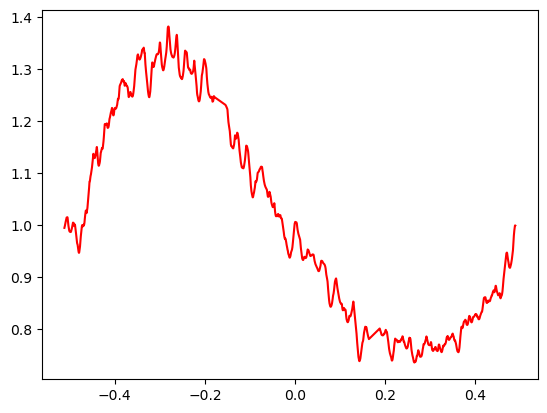

In [4]:
import matplotlib.pyplot as plt

# wave, norm_flux, continuum
plt.plot(wave, norm_flux, c= 'red')
# plt.plot(x[0, 1, :], x[0, 0, :], 'blue')
plt.show()

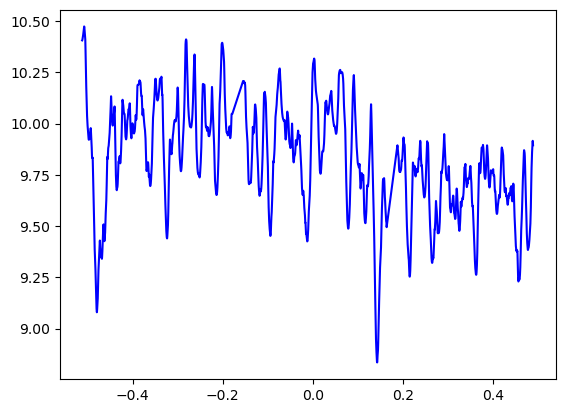

In [5]:
plt.plot(x[0, 1, :], x[0, 0, :], 'blue')
plt.show()

In [13]:
import torch
v = torch.stack([torch.from_numpy(np.asarray(GISIC.normalize(x[i, 1, :].numpy(), x[i, 0, :].numpy(), sigma=30))) for i in range(len(x))])
#wave, norm_flux, continuum


/home/mvasist/miniconda3/envs/HighResear/lib/python3.9/site-packages/GISIC/spectrum.py:92: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  SEGMENT = self.frame[self.frame['wave'].between(self.ZEROS[i], self.ZEROS[i+1], inclusive=True)].copy()
/home/mvasist/miniconda3/envs/HighResear/lib/python3.9/site-packages/GISIC/spectrum.py:92: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  SEGMENT = self.frame[self.frame['wave'].between(self.ZEROS[i], self.ZEROS[i+1], inclusive=True)].copy()
/home/mvasist/miniconda3/envs/HighResear/lib/python3.9/site-packages/GISIC/spectrum.py:92: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  SEGMENT = self.frame[self.frame['wave'].between(self.ZEROS[i], self.ZEROS[i+1], inclusive=True)].copy()
/home/mvasist/miniconda3/envs/HighResear/lib/python3.9/site-packages/GISIC/spectrum.py:9

In [14]:
v.size()

torch.Size([16, 3, 6144])

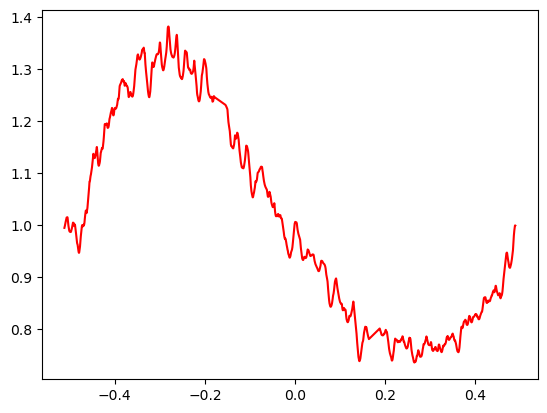

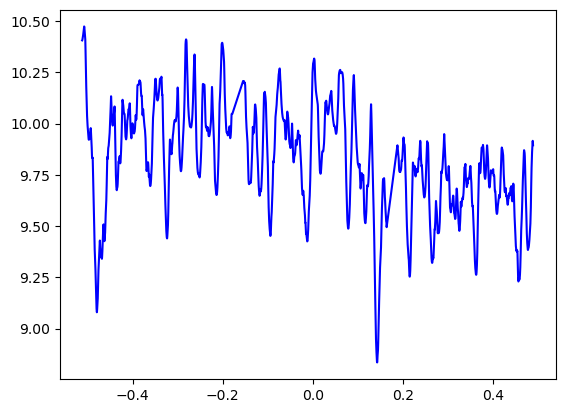

In [16]:
plt.plot(v[0, 0, :], v[0, 1, :], 'red')
plt.show()
plt.plot(x[0, 1, :], x[0, 0, :], 'blue')
plt.show()

In [2]:
validset = H5Dataset(datapath / 'valid.h5', batch_size=16, shuffle=True)

for theta, x in trainset:
    print(theta.size(), x.size())
    break

NameError: name 'H5Dataset' is not defined

In [ ]:
import scipy
from scipy.interpolate import CubicSpline
from DataProcuring import Data

d = Data()
data_wavelengths_norm = d.data_wavelengths_norm


cs = CubicSpline ()



In [ ]:
'''
TO DO 

- check if the full theta has the same wavelengths
- if not interpolate, if yes, keep
- try attention layers on it now that it only has 1 channel 
- try causalconv1d with and without normalizing spectra /softclip with 1/2 channels 

'''

In [1]:
import GISIC
import numpy as np
from lampe.data import H5Dataset
from pathlib import Path
import os
import torch

True

In [4]:
from Embedding.MHA import GPTLanguageModel
import torch
import torch.nn as nn 

x = torch.randn((16,6144))
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [2]:
attention = GPTLanguageModel(128, 4, 8, 377, device)  #n_embedding, n_head, n_blocks, block_size

/home/mvasist/miniconda3/envs/HighResear/lib/python3.9/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [3]:
attention(x)

torch.Size([16, 6144, 128])


IndexError: index out of range in self

In [6]:
position_embedding_table = nn.Embedding(128, 256)
y = torch.randn((16, 6144))

In [8]:
position_embedding_table(y.long())

IndexError: index out of range in self